# Random Forest Classification - Cloths Company Data 

## Data Dictionary 

## Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier as RF 
from feature_engine.outliers import Winsorizer
from sklearn.metrics import confusion_matrix,accuracy_score
import warnings
warnings.filterwarnings("ignore")

In [6]:
df=pd.read_csv("D:/Documents/Datasets/Company_data.csv")
df.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


In [7]:
df.shape

(400, 11)

rows=400 columns=11

In [8]:
df.dtypes

Sales          float64
CompPrice        int64
Income           int64
Advertising      int64
Population       int64
Price            int64
ShelveLoc       object
Age              int64
Education        int64
Urban           object
US              object
dtype: object

In [9]:
df.columns

Index(['Sales', 'CompPrice', 'Income', 'Advertising', 'Population', 'Price',
       'ShelveLoc', 'Age', 'Education', 'Urban', 'US'],
      dtype='object')

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    object 
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    object 
 10  US           400 non-null    object 
dtypes: float64(1), int64(7), object(3)
memory usage: 34.5+ KB


In [11]:
df.isnull().sum()

Sales          0
CompPrice      0
Income         0
Advertising    0
Population     0
Price          0
ShelveLoc      0
Age            0
Education      0
Urban          0
US             0
dtype: int64

There are no null values in dataset

In [12]:
df.describe()

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,7.496325,124.975000,68.657500,6.635000,264.840000,115.795000,53.322500,13.900000
std,2.824115,15.334512,27.986037,6.650364,147.376436,23.676664,16.200297,2.620528
min,0.000000,77.000000,21.000000,0.000000,10.000000,24.000000,25.000000,10.000000
25%,5.390000,115.000000,42.750000,0.000000,139.000000,100.000000,39.750000,12.000000
50%,7.490000,125.000000,69.000000,5.000000,272.000000,117.000000,54.500000,14.000000
75%,9.320000,135.000000,91.000000,12.000000,398.500000,131.000000,66.000000,16.000000
max,16.270000,175.000000,120.000000,29.000000,509.000000,191.000000,80.000000,18.000000


## Univariate Analysis

In [13]:
df["ShelveLoc"].value_counts()

ShelveLoc
Medium    219
Bad        96
Good       85
Name: count, dtype: int64

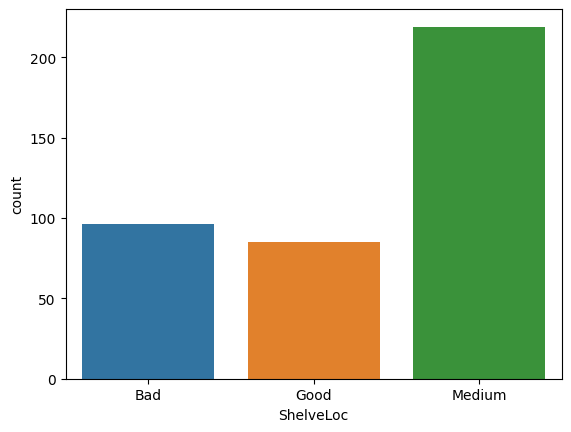

In [14]:
sns.countplot(x=df["ShelveLoc"])
plt.show()

In ShelveLoc,there are 219 datapoints is in 2nd category,85 in 1st category and 96 in 0th category. 

In [15]:
df["Urban"].value_counts()

Urban
Yes    282
No     118
Name: count, dtype: int64

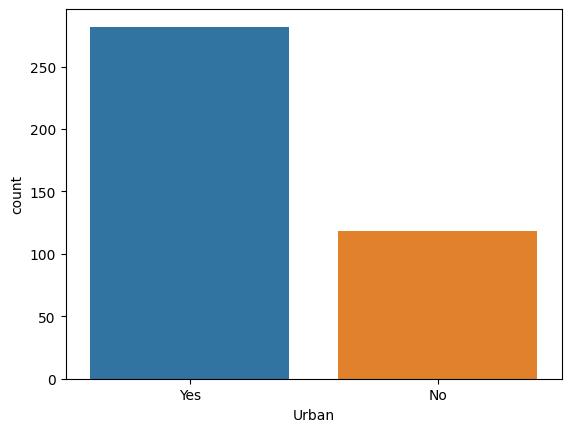

In [16]:
sns.countplot(x=df["Urban"])
plt.show()

There are 282 stores are in urban area and 118 stores are in rural area.

In [17]:
df["US"].value_counts()

US
Yes    258
No     142
Name: count, dtype: int64

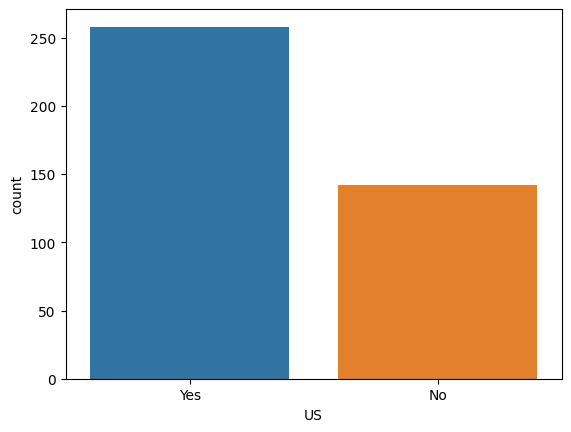

In [18]:
sns.countplot(x=df["US"])
plt.show()

There are 258 stores are in US and 142 stores are not in US.

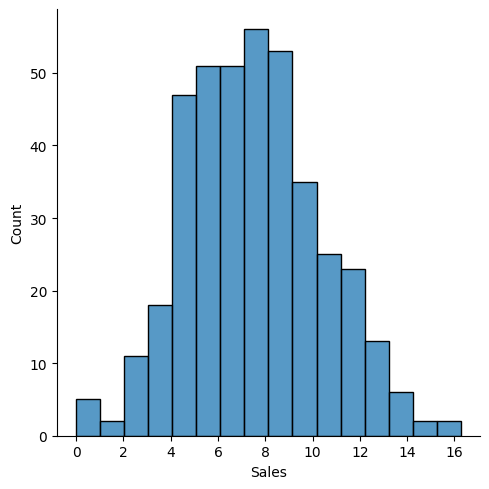

In [19]:
sns.displot(df["Sales"])
plt.show()

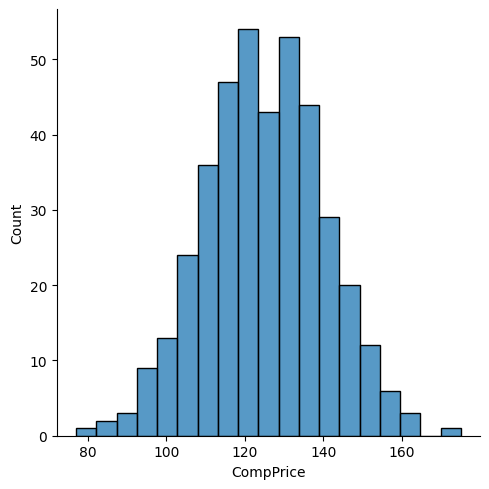

In [20]:
sns.displot(df["CompPrice"])
plt.show()

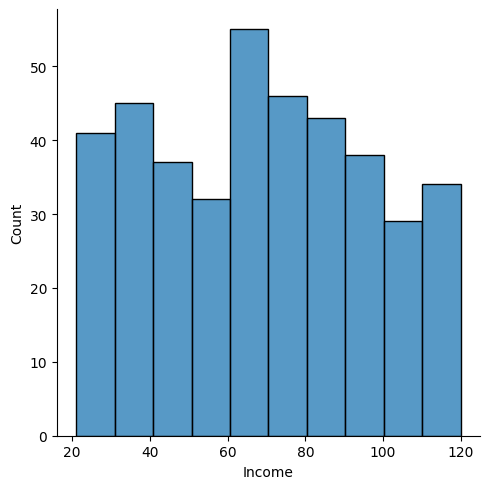

In [21]:
sns.displot(df["Income"])
plt.show()

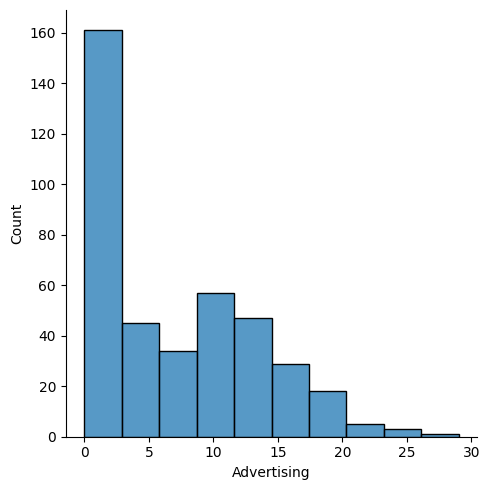

In [22]:
sns.displot(df["Advertising"])
plt.show()

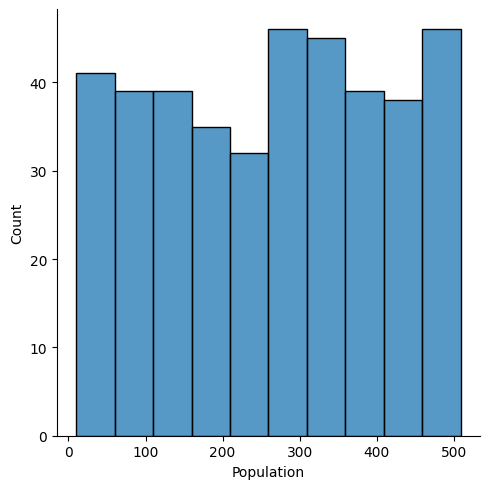

In [23]:
sns.displot(df["Population"])
plt.show()

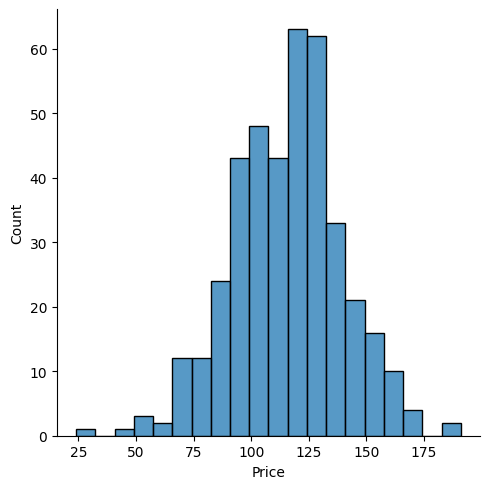

In [24]:
sns.displot(df["Price"])
plt.show()

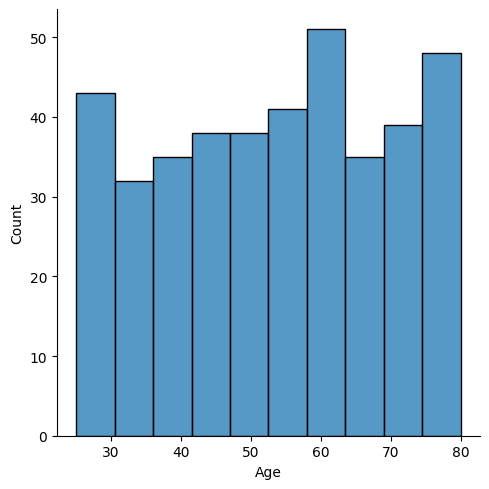

In [25]:
sns.displot(df["Age"])
plt.show()

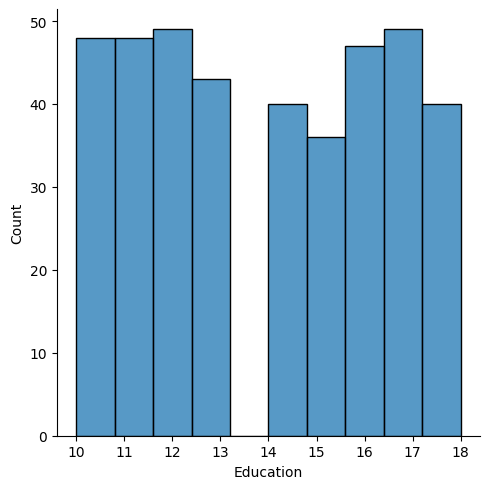

In [26]:
sns.displot(df["Education"])
plt.show()

Draw Boxplot for checking outliers

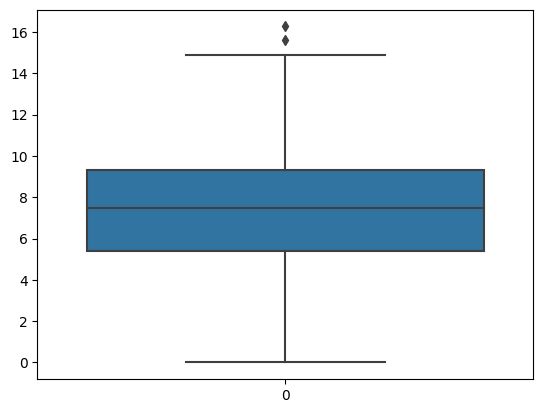

In [27]:
sns.boxplot(df["Sales"])
plt.show()

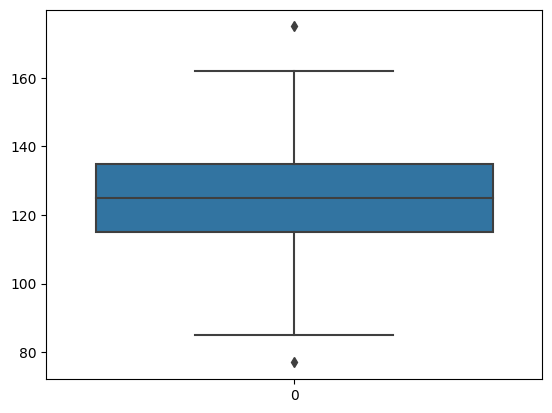

In [28]:
sns.boxplot(df["CompPrice"])
plt.show()

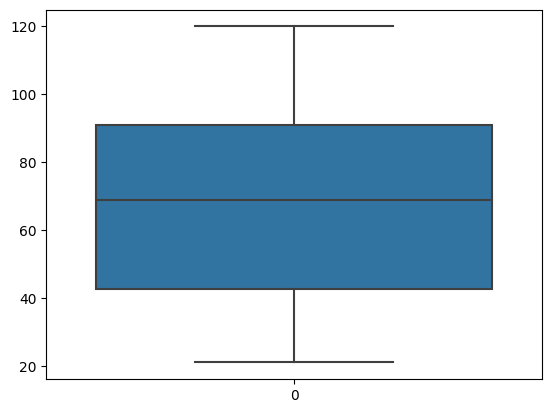

In [29]:
sns.boxplot(df["Income"])
plt.show()

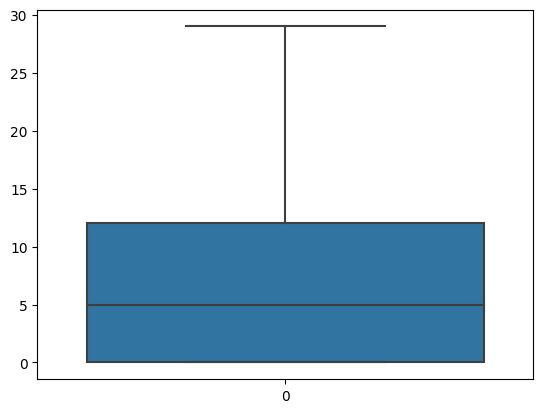

In [30]:
sns.boxplot(df["Advertising"])
plt.show()

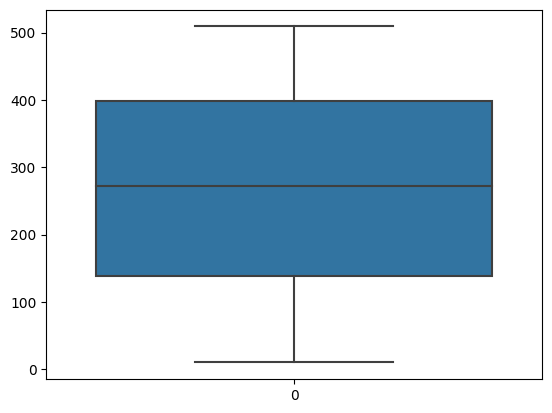

In [31]:
sns.boxplot(df["Population"])
plt.show()

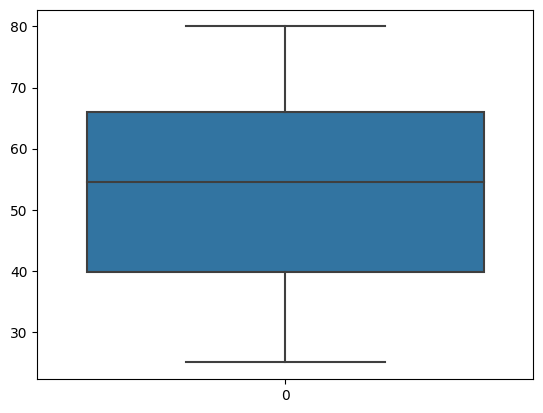

In [32]:
sns.boxplot(df["Age"])
plt.show()

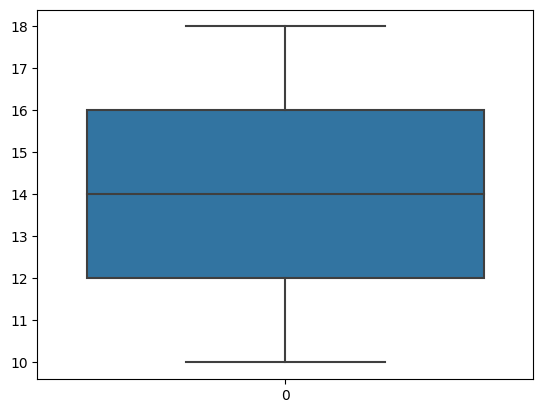

In [33]:
sns.boxplot(df["Education"])
plt.show()

Only Sales and CompPrice having outliers.
So, use winsonizer to remove outliers

In [34]:
winsor=Winsorizer(capping_method="iqr",fold=1.5,variables=["Sales"],tail="both")
df["Sales"]=winsor.fit_transform(df[["Sales"]])

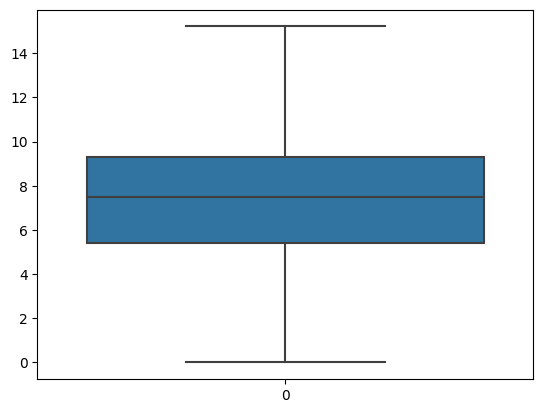

In [35]:
sns.boxplot(df["Sales"])
plt.show()

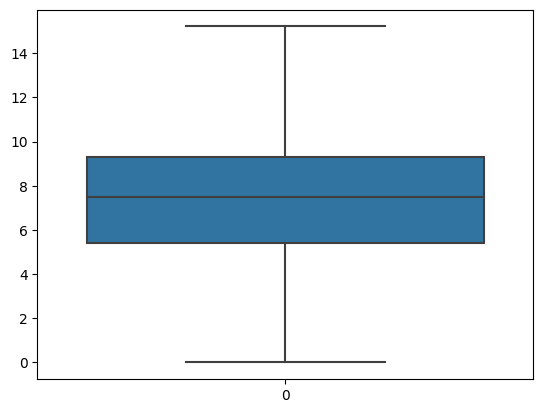

In [36]:
winsor=Winsorizer(capping_method="iqr",fold=1.5,variables=["CompPrice"],tail="both")
df["CompPrice"]=winsor.fit_transform(df[["CompPrice"]])
sns.boxplot(df["Sales"])
plt.show()

Now outliers are removed from Sales and CompPrice

In sales and price, negative correlation is there.
In compPrice and price have positive correlation.


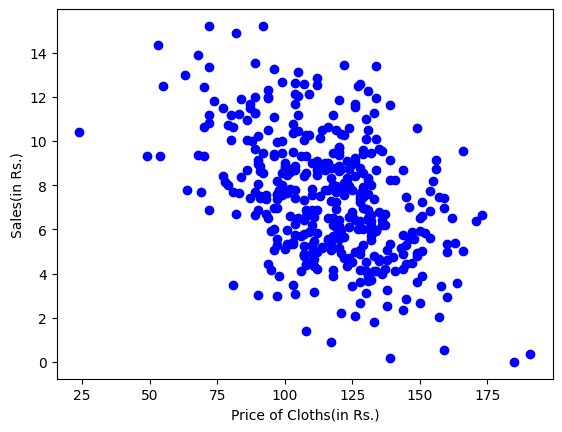

In [41]:
plt.scatter(df["Price"],df["Sales"],color="blue")
plt.xlabel("Price of Cloths(in Rs.)")
plt.ylabel("Sales(in Rs.)")
plt.show()

If prices of cloths are increasing then sales of cloths are decreasing.

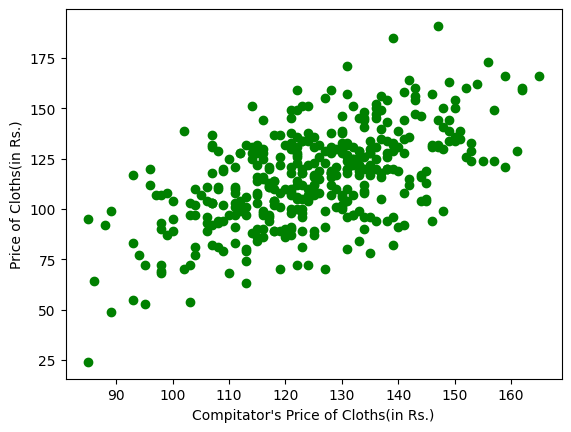

In [42]:
plt.scatter(df["CompPrice"],df["Price"],color="green")
plt.xlabel("Compitator's Price of Cloths(in Rs.)")
plt.ylabel("Price of Cloths(in Rs.)")
plt.show()

If compitators are increasing prices of cloths then price of cloths of company is also increasing.

In [43]:
Bins=[0,5,10,15,20]
label=["low","avg","good","excellent"]
df["Sales"]=pd.cut(df["Sales"],Bins,labels=label)

In [44]:
df.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,avg,138,73,11,276,120,Bad,42,17,Yes,Yes
1,good,111,48,16,260,83,Good,65,10,Yes,Yes
2,good,113,35,10,269,80,Medium,59,12,Yes,Yes
3,avg,117,100,4,466,97,Medium,55,14,Yes,Yes
4,low,141,64,3,340,128,Bad,38,13,Yes,No


In [45]:
df.Sales.value_counts()

Sales
avg          245
low           76
good          76
excellent      2
Name: count, dtype: int64

In [46]:
le=LabelEncoder()
df["Sales"]=le.fit_transform(df["Sales"])
df["ShelveLoc"]=le.fit_transform(df["ShelveLoc"])
df["Urban"]=le.fit_transform(df["Urban"])
df["US"]=le.fit_transform(df["US"])

In [47]:
df.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,0,138,73,11,276,120,0,42,17,1,1
1,2,111,48,16,260,83,1,65,10,1,1
2,2,113,35,10,269,80,2,59,12,1,1
3,0,117,100,4,466,97,2,55,14,1,1
4,3,141,64,3,340,128,0,38,13,1,0


In [48]:
x=df.drop(["Sales"],axis=1)
y=df["Sales"]

## Split the Dataset

In [49]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3)

In [50]:
model=RF()

In [51]:
model.fit(x_train,y_train)

RandomForestClassifier()

In [52]:
y_pred=model.predict(x_test)
y_pred

array([0, 0, 0, 0, 0, 2, 0, 3, 0, 0, 3, 3, 0, 0, 0, 3, 0, 3, 0, 2, 0, 0,
       0, 3, 0, 0, 0, 0, 0, 0, 3, 3, 0, 0, 0, 0, 3, 0, 3, 0, 0, 2, 0, 0,
       0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 3, 3, 0, 3, 0, 2, 0, 2, 0,
       2, 0, 0, 0, 3, 3, 0, 0, 2, 0, 2, 0, 0, 0, 0, 0, 2, 0, 0, 2, 3, 0,
       2, 3, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 2, 0, 0, 0, 0, 0, 0, 0, 0])

In [53]:
cm=confusion_matrix(y_test,y_pred)

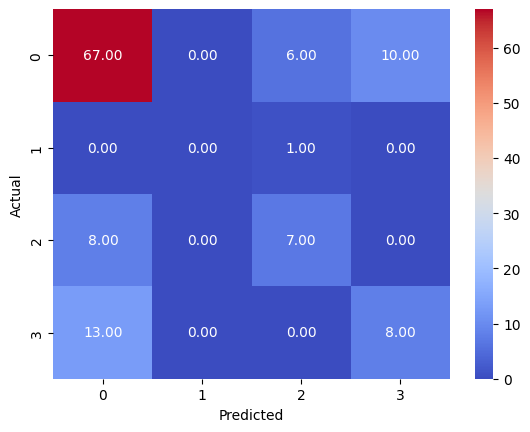

In [54]:
sns.heatmap(cm,annot=True,cmap="coolwarm",fmt=".2f")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [55]:
acc=accuracy_score(y_test,y_pred)
acc

0.6833333333333333